In [16]:
#warnings
import warnings
warnings.filterwarnings('ignore')

# Título do projeto: Previsão de doenças epáticas.

# Introdução

## Sobre o cojunto de dados.

- Fonte: [clique aqui](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)


- Descrição: 

Este conjunto de dados contém 416 registros de pacientes hepáticos e 167 registros de pacientes não hepáticos. O conjunto de dados foi coletado no nordeste de Andhra Pradesh, Índia. Seletor é um rótulo de classe usado para dividir em grupos (paciente com fígado ou não). Este conjunto de dados contém 441 registros de pacientes do sexo masculino e 142 registros de pacientes do sexo feminino. Qualquer paciente com idade superior a 89 anos é listado como tendo “90 anos”. [Fonte](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)

Autores do dataset: Bendi Ramana, N. Venkateswarlu.

## Motivação

Este projeto foi desenvolvido como parte da do curso 2 (Big Data Real-Time Analytics com Python e Spark) da trilha de formação **Cientista de Dados** da [Data Science Academy](https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados).



## Dicionário de dados

|Label|Descrição|Tipo|
|------|-------|-----|
|Age   |Idade|numérico|
|Gender|Genero|string|
|Total_Bilirubin|Exame Clínico|numérico|
|Direct_Bilirubin|Exame Clínico|numérico|
|Alkaline_Phosphotase|Exame Clínico|numérico|
|Alamine_Aminotransferase|Exame Clínico|numérico|
|Aspartate_Aminotransferase|Exame Clínico|numérico|
|Total_Protiens|Exame Clínico|numérico|
|Albumin|Exame Clínico|numérico|
|Albumin_and_Globulin_Ratio|Exame Clínico|numérico|
|Dataset|Diagnóstico|numérico|

# Projeto

## **Definição do problema**

**O projeto visa a construção de um modelo de ML para previsão de doenças epáticas. Conforme definido pela área técnica da empresa, é necessário que o algoritmo apresente uma capacidade preditiva de, no mínimo, 75%.**


Temos dados disponibilizados on-line, da base dados UCI. São estão disponíveis opções para obter mais dados. Podem ser acessados pelo site disponibilizado acima (fonte).


- **Dados disponíveis:**

    * Idade (4 - 90 anos)
    * Gênero (feminino - masculino)
    * Diagnóstico (2-1)
    * Dados clínicos (avaliam a saúde do fígado e alguns aspectos do metabolismo):
        * Total_Bilirubin e Direct_Bilirubin: medem os nível de bilirubina no corpo. A bilirubina é responsável pelo pegmento amarelo.
        * Alkaline_Phosphotase: Enzima presente principalmente no fígado e ossos.
        * Alamine_Aminotransferase (ALT) e Aspartate_Aminotransferase (AST): São enzimas liberadas quando as células do fígado estão danificadas.
        * Total_Protiens: Mede as proteínas totais no sangue, incluindo albumina e globulina.
        * Albumin: Avalia os níveis da proteína albumina no sangue.
        * Albumin_and_Globulin_Ratio: É a relação entre os níveis de albumina e globulina no sangue.



- **Dados que poderiam ser investigados (de acordo com informações de sites especializados), mas não estão disponíveis:**
    - Histórico de doenças crônicas
    - Histórico de consumo de alcool
    - Histórico da doença na família
    - Hábitos de vida
    - Consumo de medicamentos
    - Demais exames clínicos: gama-glutamiltransferase (GGT) e a proteína C reativa (PCR).


- **Quais dados não serão necessários:**

Iniciaremos a análise exploratória com todos os dados disponíveis, e avaliaremos o impacto quando às relacionarmos.

## Bibliotecas

In [19]:
# imports

    # pystack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

    # computação científica e análise estatística
import scipy
from scipy import stats

    # Machine Learning
from sklearn.model_selection import train_test_split #split treino e teste
from sklearn.model_selection import GridSearchCV # ajuste de hiperpâmetros
from sklearn.model_selection import RandomizedSearchCV # ajuste de hiperpâmetros
from sklearn.model_selection import cross_val_score # aplicação de validação cruzada
from sklearn.preprocessing import StandardScaler # feature scalling
from sklearn.preprocessing import LabelEncoder # codificação de variáveis
from sklearn.linear_model import LogisticRegression # Regressão Logística
from sklearn.ensemble import RandomForestClassifier # Floresta Aleatória
from sklearn.tree import DecisionTreeClassifier # Árvores de decisão
from sklearn.neighbors import KNeighborsClassifier # kNN Classifier
from sklearn.svm import SVC # Support Vector Classifier

#balanceamento
from imblearn.over_sampling import SMOTE

#imputação de nan
from sklearn.impute import KNNImputer

#feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#métricas
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix
    

    
#persistir dados
import pickle
import joblib
    

In [20]:
# configuração de ambiente

from platform import python_version
import warnings
%load_ext watermark
print(f'Versão python: {python_version()}')
%watermark -a "Fagner F. Farias (fagner.ffarias3@gmail.com/47 9 9737 6438)" --iv
warnings.filterwarnings('ignore')


Versão python: 3.11.4
Author: Fagner F. Farias (fagner.ffarias3@gmail.com/47 9 9737 6438)

joblib    : 1.2.0
sklearn   : 1.3.0
scipy     : 1.10.1
pandas    : 1.5.3
seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.24.3



In [21]:
from matplotlib import rcParams

# Ajuste das configurações de estilo
rcParams['figure.figsize'] = (15,10)
rcParams['lines.linewidth'] = 2
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['lines.markersize'] = 10  # Correção aqui, removendo espaço em excesso
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

## Funções

In [22]:
# Função para instânciar dados e fazer cópia
class dados():
    
    def __init__(self, path = None, y = None, x = None):
        
        self._y = None
        self._x = None
        self._dados = None
        
        print("Entre com o path do .csv")
        
        
    #retorna o valor de um objeto protegido
    @property
    def dataframe(self):
        return self._dados
    
    
    #seta o valor de um objeto protegido
    @dataframe.setter
    def  dataframe(self, dados):
        
        try:
            
            if isinstance(dados, str):
                
                self._dados = pd.read_csv(dados)
                
                print('Dados instanciados com sucesso!')
                
            elif isinstance(dados, pd.DataFrame):
                
                self._dados = dados
                
                print('Dados instanciados com sucesso!')
                
        except FileNotFoundError as exc:
            print("Erro. o path correto deve ser informado.")
    
    #retorna o valor de um objeto protegido
    @property
    def target(self):
        return self._y
    
    
    #seta o valor de um objeto protegido
    @target.setter
    def  target(self, y):
        
        try:
            
            if isinstance(y, pd.DataFrame):
                
                self._y = y
                
                print('target instanciado com sucesso!')
                
            else:
                print("Erro. A variável target deve ser um pd.DataFrame.")
                
        except Exception as exc:
            print("Erro. A variável target deve ser um pd.DataFrame.")
            
    @property
    def preditoras(self):
            return self._x
        
        
    @preditoras.setter
    def preditoras(self, x):
        
        try:
            if isinstance(x, pd.DataFrame):
                
                self._x = x
                
                print("Variáveis preditoras armazenadas com sucesso!")
                
            else:
                print("As variáveis preditoras devem ser um pd.DataFrame")
        
        except Exception:
            
            print("As variáveis preditoras devem ser um pd.DataFrame")

In [33]:
# Classe lata wrangling
class Medidas(dados):
    
    def __init__(self):
        
        pass    
       
    def duplicated(self, remove = False):
        if remove:
            
            self.dataframe.drop_duplicates(inplace = True)
        else:
            return self.dataframe[self.dataframe.duplicated(keep = False)]
    
    
    def nums(self, drop: list =  None):
        
        if drop:
            
            return self.dataframe.select_dtypes(include = ['int', 'float']).columns.drop(drop)

        else:
            
            return self.dataframe.select_dtypes(include = ['int', 'float']).columns
        
    def tendenciaCentral(self):
        
        descricao = self.dataframe[self.nums()].describe().T.drop(['std'], axis = 1)
        
        descricao['moda'] = self.dataframe[self.nums()].mode().iloc[0]
        
        descricao['range'] = self.dataframe[self.nums()].max() - self.dataframe[self.nums()].max()
        
        descricao = descricao[['count', 'mean', 'moda', '50%',  '25%', '75%', 'min','max', 'range']]
        
        return(descricao)
    
    
   
    def dispersao(self):
        
        std = self.dataframe[self.nums()].std()
        
        coefVariacao = self.dataframe[self.nums()].mean() / self.dataframe[self.nums()].std()
    
        medidas_dispersao = pd.DataFrame([std, coefVariacao], index=['std', 'coefVariacao']).T
        
        return(medidas_dispersao)
    
    
    def distribuicao(self):
        
        skewness = [stats.skew(self.dataframe[col]) for col in self.nums()]
        
        kurtosis = [stats.skew(self.dataframe[col]) for col in self.nums()]
        
        medidas_distribuicao = pd.DataFrame([skewness, kurtosis], index = ['skewness', 'kurtosis'], columns=self.nums())
        
        return medidas_distribuicao
    
    
    def histogramas(self):
        dimensoes = len(self.nums())
        for i, col in enumerate(self.nums()):
            plt.subplot(int (dimensoes/2), int(dimensoes/2), i + 1)
            sns.histplot(self.dataframe[col], color = 'green', kde=True)
            plt.tight_layout()

        # definir parametros
        plt.text(
            x=0.5,  
            y=1.05,  
            s='Distribuição de Frequências',  
            fontsize=20,  
            ha='center',  
            va='center',
            alpha = 0.85,
            fontweight = 'bold',
            transform=plt.gcf().transFigure 
        )

        plt.text(
            s = 'Histrograma',
            x = 0.5,
            y = 1.01,
            ha = 'center',
            va = 'center',
            fontsize = 15,
            alpha = 0.6,
            transform = plt.gcf().transFigure
        )


# Boxplot

    def boxplots(self):
        dimensoes = len(self.nums())
        for i, col in enumerate(self.nums()):
            plt.subplot(int (dimensoes/2), int(dimensoes/2), i + 1)
            sns.boxplot(y = self.dataframe[col])
            plt.tight_layout()

        # definir parametros
        plt.text(
            x=0.5,  
            y=1.05,  
            s='Distribuição de Frequências',  
            fontsize=20,  
            ha='center',  
            va='center',
            alpha = 0.85,
            fontweight = 'bold',
            transform=plt.gcf().transFigure 
        )

        plt.text(
            s = 'Boxplot',
            x = 0.5,
            y = 1.01,
            ha = 'center',
            va = 'center',
            fontsize = 15,
            alpha = 0.6,
            transform = plt.gcf().transFigure
        )

 
    # avaliar correlação das variáveis, primeiro, somente com a variável target
    def correlacaoTarget(self, target: str):
        #calcular correlacao
        plt.figure(figsize=(5,5))
        correlacao = self.dataframe.corr()[[target]]
        
        #plotando
        sns.heatmap(data = correlacao,
                   vmin= -1,
                   vmax= 1,
                   annot=True,
                   cmap='Purples',
                   xticklabels=False);

        plt.yticks(size = 8)
        plt.text(
            s = 'Correlação',
            x = 0.32,
            y = 0.95,
            fontsize = 20,
            alpha = 0.85,
            transform = plt.gcf().transFigure
        )
        plt.text(
            s = f'Preditoras x Predita({target})',
            x = 0.27,
            y = 0.90,
            fontsize = 10,
            alpha = 0.6,
            transform = plt.gcf().transFigure
        )
        return correlacao
    
# avaliar multicolineatidade entre as variáveis bem correlacionadas
    def correlacao_multico(self, coefMin: float, coefMax = float, target = str, correlacaoTarget = pd.DataFrame):
        
        correlacao = correlacaoTarget
        
        varCorrelaoes = correlacao[(correlacao.values < coefMin) | (correlacao.values >  coefMax)].index
               
        novas_correlacoes = medidas.dataframe[varCorrelaoes].corr()
        
        multiCor = novas_correlacoes[((novas_correlacoes.values < -0.8) & (novas_correlacoes.values > - 0.99)) | ((novas_correlacoes.values >  0.8) & (novas_correlacoes.values <  0.99))].index
        
        multiCor = multiCor.drop_duplicates()
        
        np.fill_diagonal(novas_correlacoes.values, 0)
        
        #plotando
        grafico = sns.heatmap(data = novas_correlacoes,
                       vmin= -1,
                       vmax= 1,
                       annot=True,
                       cmap='Purples');

        plt.yticks(size = 8)
        plt.text(
                    s = 'Correlação',
                    x = 0.38,
                    y = 0.91,
                    fontsize = 20,
                    alpha = 0.85,
                    transform = plt.gcf().transFigure
                )
        plt.text(
                    s = f'Avaliando multicolinearidade entre as correlações',
                    x = 0.33,
                    y = 0.89,
                    fontsize = 10,
                    alpha = 0.6,
                    transform = plt.gcf().transFigure
                )
            
        return grafico, multiCor, varCorrelaoes
    
    def pairPlot(self, variaveis: list = str):
        
        sns.pairplot(self.dataframe[variaveis],
                     plot_kws = {"s": 20},
                     corner = True,
                     height=3)

        plt.text(s = 'Correlação entre variáveis com coeficiente alto.',
                x = 0.3,
                y = .95,
                fontsize = 20,
                alpha = 0.85,
                transform = plt.gcf().transFigure);

In [34]:
# classe para feature engering

class featureEngenerring(Medidas):
    
    def __init__(self):
        
        pass
    
    # printa a frequência de valores, para valores considerados outliers
    def frequencyCalculate(self):
        
        for col in self.nums():
            
            sns.boxplot(data=self.dataframe[col])

            # objetos de linha que representam os limites do boxplot
            boxplot = plt.gca().lines

            # limites
            lower_whisker = boxplot[0].get_ydata()[1]  # Limite inferior
            upper_whisker = boxplot[1].get_ydata()[1]  # Limite superior
            plt.close()
            # Filtre os outliers com base nos limites do boxplot
            
            print("-" * 50)
            
            print(self.dataframe[col][(self.dataframe[col] > upper_whisker) | (self.dataframe[col] < lower_whisker)].value_counts().sort_index().tail(10))
            
            # no número 10, retornar se o valor estiver contino no conjunto de valores outliers
    
    #retorna array de outliers para serem excluídos do dataset
    def outliersCalculate(self):
        
        #incluir possibilidade de escolher o método de exclusão dos outliers
        
        outliers = np.array([True] * len(self.dataframe[self.nums()]))
        
        for col in self.nums():
            
            sns.boxplot(data=self.dataframe[col])

            
            boxplot = plt.gca().lines

            
            lower_whisker = boxplot[0].get_ydata()[1]  # Limite inferior
            upper_whisker = boxplot[1].get_ydata()[1]  # Limite superior

            
            plt.close()
            
            
            coluna_outliers = ~((self.dataframe[col] > upper_whisker) | (self.dataframe[col] < lower_whisker))
            outliers = outliers & coluna_outliers
        
        print(f'São {np.count_nonzero(outliers)} que não são outliers, e {len(outliers) - np.count_nonzero(outliers)}')
        return outliers
        
    # método para remover outliers
    def drop_outliers(self, outliers: np.array):
        
        self.dataframe = self.dataframe[outliers]
    
    
    # método para remover variáveis que não seguirão
    def drop_columns(self, colums: list = None):
        if colums is not None:
            
            self.dataframe.drop(colums, axis = 1, inplace = True)
    
    # método para dividir predita de preditoras
    def x_y(self, target: str):
        
        self.target = self.dataframe[[target]]
        
        self.preditoras = self.dataframe.drop(target, axis = 1)

    
    

    
    
    


In [35]:
# classe para split e limpeza da base

class splitClean():
    
    def __init__(self, preditoras: pd.DataFrame, target: pd.DataFrame):
        if preditoras.shape[0] == target.shape[0]:
            self.preditoras = preditoras
            self.target = target

        else:
            print("Classe não instanciada. Verifique as dimensões dos objetos")
            
            
    def split(self, tamanho_teste = .25):
        x = self.preditoras
        y = self.target

        # divisão das bases
        X_train, X_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            test_size = tamanho_teste,
                                                            random_state = 1245,
                                                            stratify = y
                                                            )
        setattr(self, "X_train", X_train)
        setattr(self, "X_test", X_test)
        setattr(self, "y_train", y_train)
        setattr(self, "y_test", y_test)
    
    
    def __imputer_fit(self):
            # Instanciando algoritmo e treinando com preditores de treinamento
        imputer = KNNImputer(n_neighbors=5)
        imputer_fit = imputer.fit(self.X_train)
        return imputer_fit
    
    def imputer_data_train(self):
                    # aplicando imputação aos dados de treinamento
        imputed_data_train = self.__imputer_fit().transform(self.X_train)
        self.X_train = pd.DataFrame(imputed_data_train, columns= self.X_train.columns)
    
    def imputer_data_test(self):
          # aplicando imputação aos dados de treinamento
        imputed_data_test = self.__imputer_fit().transform(self.X_test)
        self.X_test = pd.DataFrame(imputed_data_test, columns= self.X_test.columns)
  
    #balanceamento de classes
    # gráfico para visualizar classes

    def countPlot(self, variavel = str):
        plt.figure(figsize=(4,4))
        ax = sns.countplot(data = self.y_train,
                     x = f'{variavel}')

        ax.legend(title = 'Categoria',
                  title_fontsize = 10,
                  handles = ax.patches,
                  labels = ['0', '1'],
                  edgecolor = 'black',
                  borderpad = 0.5)


        #eixo x
        plt.xlabel(f'{variavel}',
                  fontweight = 'bold')
        #eixo y
        plt.ylabel('Frequência')
        plt.yticks(size = 8);


        #Título
        plt.text(s = 'Frequência absoluta',
                 fontsize = 15,
                y = 0.93,
                x = 0.50,
                ha = 'center',
                va = 'center',
                transform = plt.gcf().transFigure);

    #instanciando algoritmo
    def oversampling(self):
        oversampler = SMOTE(k_neighbors = 8)
        self.X_train, self.y_train = oversampler.fit_resample(self.X_train, self.y_train)

    def return_all(self):
        return self.X_train, self.X_test, self.y_train, self.y_test

In [36]:
# classe para transformação
class transform():
    
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train =  X_train.reset_index(drop=True)
        self.X_test = X_test.reset_index(drop=True)
        self.y_train = y_train.reset_index(drop=True)
        self.y_test = y_test.reset_index(drop=True)
        
        
    
    # métodos para calcular a cardinalidade
    def cardinalidade(self, limiar = 0.50):
        try:
            shape = self.X_train.shape[0]

            variavel = []
            for col in self.X_train.columns:

                calculo_razao = len(self.X_train[col].value_counts()) / shape

                if calculo_razao > limiar:

                    variavel.append(col)
            return variavel
        except TypeError:
            print("Insira o um float no parâmetro 'limiar'")
        
    
    def __parametrosDiscretizacao(self):
        
        n = self.X_train.shape[0]
        k = int(np.sqrt(n))
        list_labels = list(range(1, k+1))
        return list_labels, k
        
    
    
    #Discretização .fit()
    def discretizacao_treinamento(self, labels: list = str):
        
        list_labels, k = self.__parametrosDiscretizacao()
        
        for label in labels:
            # calcular intervalor com o método de sturges
            newLabel = label + '_' + "Intervalo"
            intervalos = pd.cut(self.X_train[label], bins = k, precision = 2, labels=list_labels)
            self.X_train[newLabel] = intervalos
        
        #exclui do dataset as variáveis originárias
        self.X_train.drop(labels, axis = 1, inplace=True)
            
    # discretização transform
    def discretizacao_teste(self, labels: list = str):
        
        list_labels, k = self.__parametrosDiscretizacao()
        
        for label in labels:
            newLabel = label + "_" + "Intervalo"
            intervalos = pd.cut(self.X_test[label], bins = k, precision = 2, labels = list_labels)
            self.X_test[newLabel] = intervalos


    #escalonamento - MinMaxScaler()
    def MinMaxScaler_train(self, variaveis: list = str):
        #MinmaxScaler() - aconselhável quando as variáveis possuem distribuição normal
        #instanciando minmax
        scalers = {}
        for col in variaveis:
            scaler = MinMaxScaler()
            scaler.fit(self.X_train[[col]])
            scalers[col] = scaler
        setattr(self, 'scalers', scalers)

    #observar que retorna um df, que deve ser concatenado com os dados
    def MinMaxScaler_apply(self, variaveis: list = str, teste = False):
        #aplicando
        scalers = self.scalers
        retorno = pd.DataFrame()
        for col in escalonar:
            if teste:
                self.X_test[col + "_" + "scalled"] = pd.Series(scalers[col].transform(self.X_test[col].to_numpy().reshape(-1,1)).flatten())
            else:
                self.X_train[col + "_" + "scalled"] = pd.Series(scalers[col].transform(self.X_train[col].to_numpy().reshape(-1,1)).flatten())
        
    
    #escalonamento com StandardScaler()
    
    
    


## Dicionário de funções

|Classe| Funcionalidade|
|------|---------------|
|dados|Carga dos dados|
|Medidas|Possui atributos e métodos para datawrangling|
|featureEngenerring|Possui atributos e métodos para engenharia de atributos|
|splitClean|Possui atributos e métodos para split e limpeza da base da dados|
|transform|Possui atributos e métodos para pré-processamento|

## Carga dos dados

- Testando classe que irá instanciar os dados

In [37]:
fase_1 = dados()

Entre com o path do .csv


In [38]:
fase_1.dataframe = 'dataset.csv'

Dados instanciados com sucesso!


## Data Wrangling

### Análise exploratória

#### Estatística

##### Dados numéricos

###### Análise univariada (estatísticas)

- Medidas de tendência central

In [39]:
medidas = Medidas()

In [40]:
medidas.dataframe = 'dataset.csv'

Dados instanciados com sucesso!


In [41]:
medidas.dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [43]:
# dados duplicados
duplicados = medidas.duplicated()
duplicados

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [44]:
#Eliminando dados duplicados
medidas.duplicated(remove=True)

In [45]:
# dados duplicados
duplicados = medidas.duplicated()
duplicados

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


In [526]:
medidas.tendenciaCentral()

,count,mean,moda,50%,25%,75%,min,max,range
Age,570.0,44.849123,60.0,45.00,33.0,58.00,4.0,90.0,0.0
Total_Bilirubin,570.0,3.321754,0.8,1.00,0.8,2.60,0.4,75.0,0.0
Direct_Bilirubin,570.0,1.497544,0.2,0.30,0.2,1.30,0.1,19.7,0.0
Alkaline_Phosphotase,570.0,291.750877,198.0,208.00,176.0,298.00,63.0,2110.0,0.0
Alamine_Aminotransferase,570.0,79.728070,25.0,35.00,23.0,60.00,10.0,2000.0,0.0
Aspartate_Aminotransferase,570.0,109.380702,23.0,41.00,25.0,86.75,10.0,4929.0,0.0
Total_Protiens,570.0,6.496316,7.0,6.60,5.8,7.20,2.7,9.6,0.0
Albumin,570.0,3.148947,3.0,3.10,2.6,3.80,0.9,5.5,0.0
Albumin_and_Globulin_Ratio,566.0,0.948004,1.0,0.95,0.7,1.10,0.3,2.8,0.0
Dataset,570.0,1.287719,1.0,1.00,1.0,2.00,1.0,2.0,0.0


- Medidas de dispersão

In [527]:
medidas.dispersao()

,std,coefVariacao
Age,16.242182,2.761274
Total_Bilirubin,6.267941,0.529959
Direct_Bilirubin,2.833231,0.528564
Alkaline_Phosphotase,245.291859,1.189403
Alamine_Aminotransferase,181.471697,0.439342
Aspartate_Aminotransferase,290.880671,0.376033
Total_Protiens,1.088300,5.969231
Albumin,0.796813,3.951928
Albumin_and_Globulin_Ratio,0.319635,2.965890
Dataset,0.453097,2.842038


**Interpretação**:


- fazer


- Medidas de distribuição

In [528]:
medidas.distribuicao()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
skewness,-0.046475,4.856635,3.17929,3.718587,6.677423,10.53161,-0.31011,-0.060668,NaN,0.937844
kurtosis,-0.046475,4.856635,3.17929,3.718587,6.677423,10.53161,-0.31011,-0.060668,NaN,0.937844


**Interpretação**:


- fazer

###### Análise uniivariada (gráficos)

- Distribuição

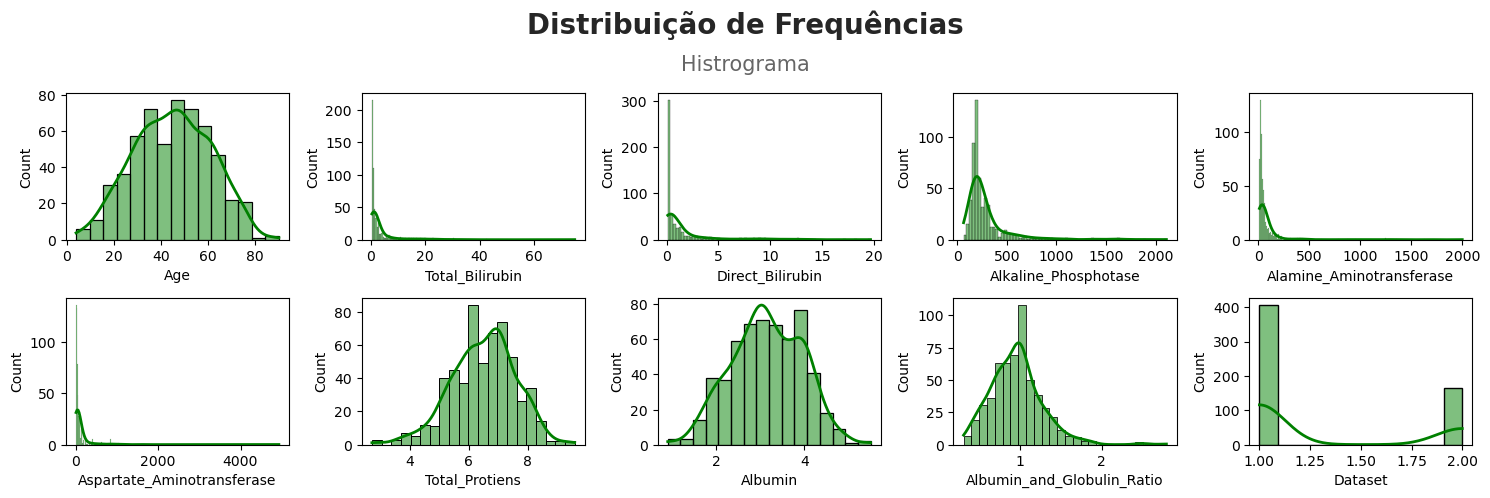

In [529]:
# Histograma
medidas.histogramas()

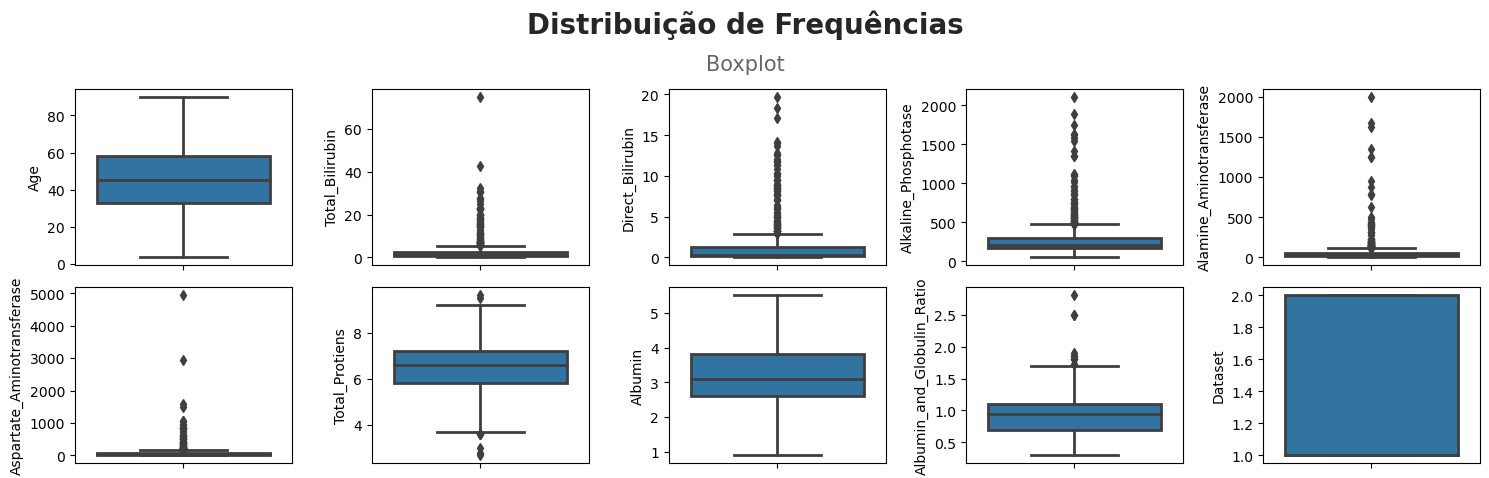

In [530]:
# Boxplot

medidas.boxplots()

###### Análise bivariada (estatísticas)

- Correlação

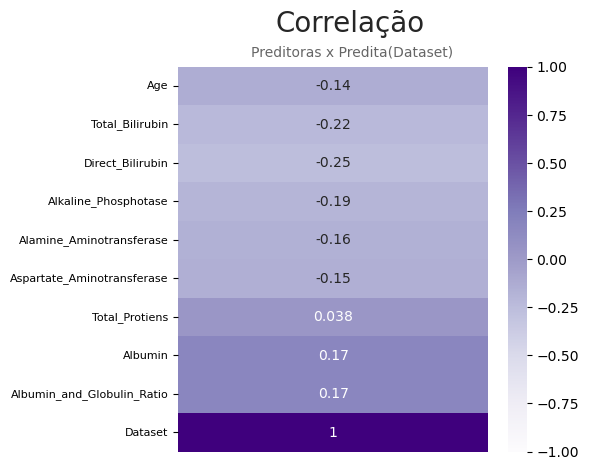

In [531]:
# avaliar correlação das variáveis, primeiro, somente com a variável target
correlacoesTarget = medidas.correlacaoTarget(target='Dataset')

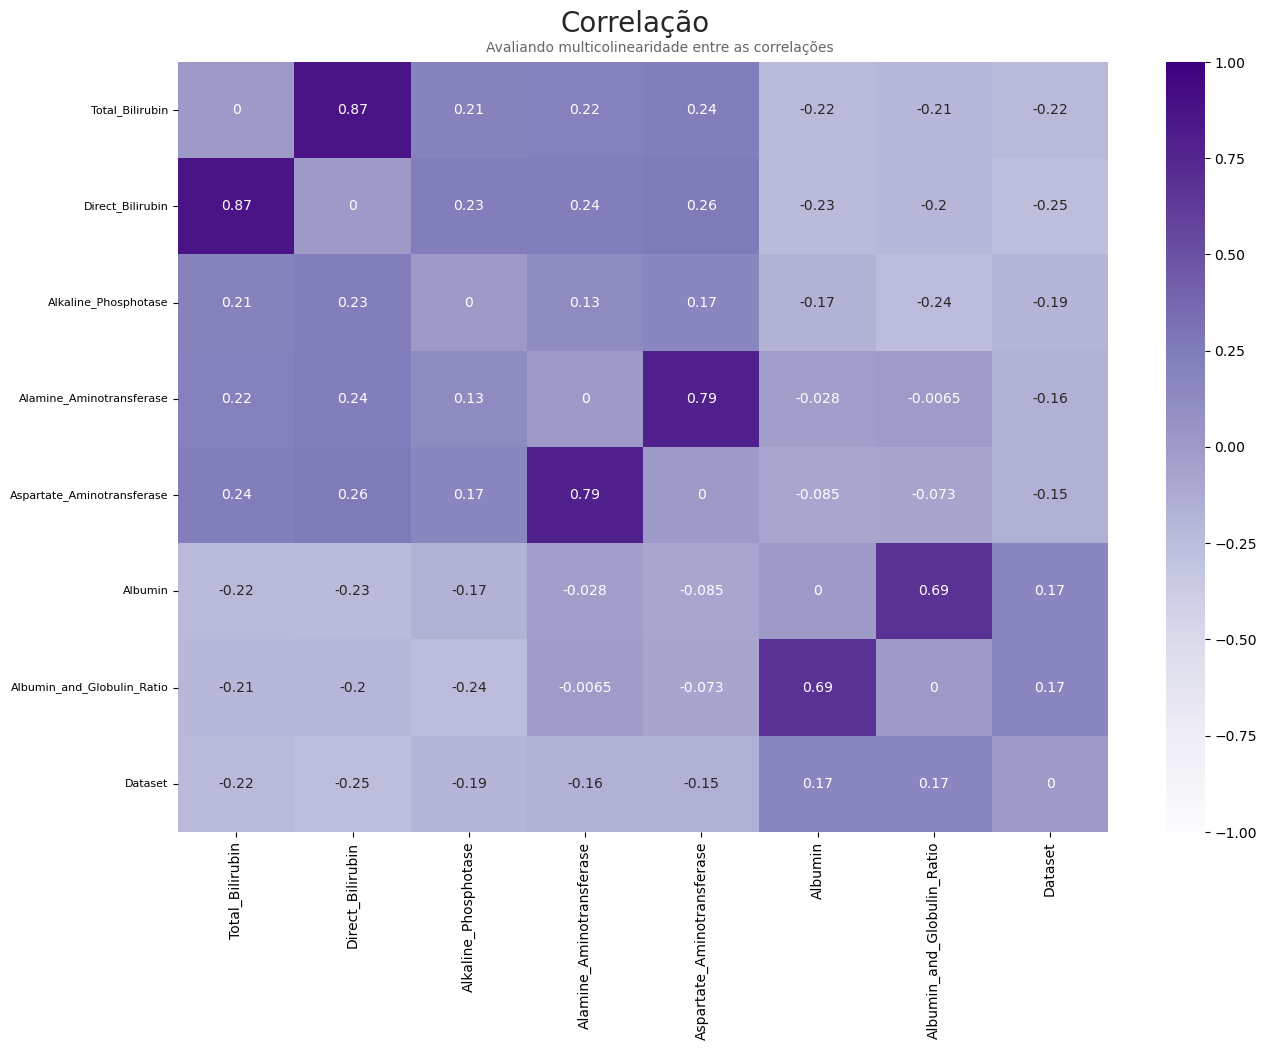

In [532]:
grafico, multicol, varCorrelacoes = medidas.correlacao_multico(coefMax=0.14,
                                                               coefMin=-0.14,
                                                               target='Dataset',
                                                               correlacaoTarget=correlacoesTarget)

###### Análise bivariada (gráficos)

- Correlação

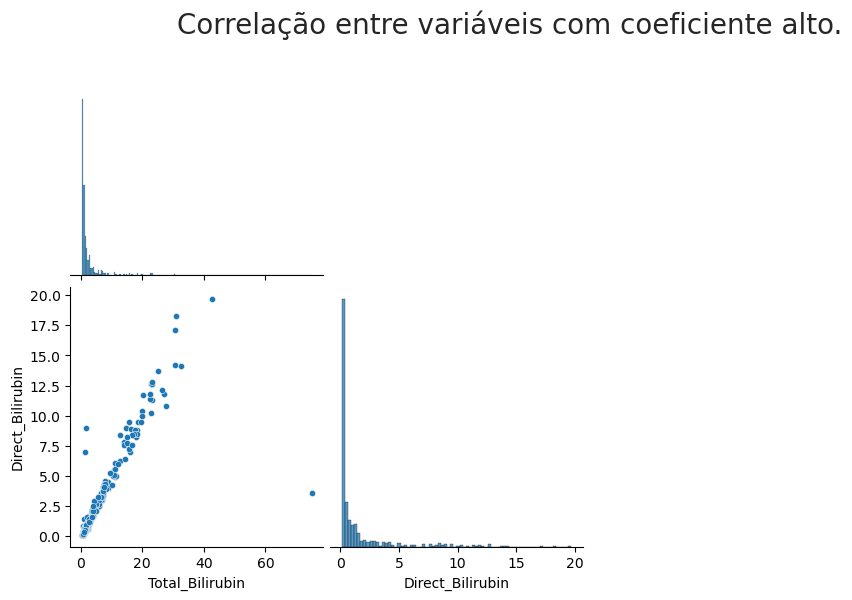

In [535]:
medidas.pairPlot(variaveis=multicol)

In [536]:
# ScatterPlots
    # plotar a relação entre as preditoras e preditas, para analisar a relação entre elas

**Validação de suposições estatístiacas**

**Existem suposições estatísticas para que se possa aplicar certos algorítmos. Contudo, como este projeto não tem a intensão de esgotar todas as fases de um projeto de ML, e, pretende somente demostrar o conhecimento no workflow de um projeto, esta fase não será realizada. Mas, ressalta-se, não é possível em ambiente profissional, seguir com o projeto de validar as suposições dos algotimos a serem aplicados.**

##### Dados categóricos

- Não há dados categóricos

## Feature Engineer (como etapa)

In [549]:
engenharia = featureEngenerring()
engenharia.dataframe = medidas.dataframe

Dados instanciados com sucesso!


In [550]:
engenharia.dataframe.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


- Remoção de variáveis que não representam informações relevantes (ex: IDs)

In [551]:
# Avaliando correlações
varCorrelacoes

Index(['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [552]:
# Avaliando possível multicolinearidade
multicol

Index(['Total_Bilirubin', 'Direct_Bilirubin'], dtype='object')

In [553]:
# Removendo dados não relacionados com o tardet
engenharia.dataframe = engenharia.dataframe[varCorrelacoes]

Dados instanciados com sucesso!


In [554]:
# Removendo dados - multicolinearidade
engenharia.dataframe = engenharia.dataframe.drop('Direct_Bilirubin', axis = 1)

Dados instanciados com sucesso!


In [555]:
engenharia.dataframe

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,187,16,18,3.3,0.90,1
1,10.9,699,64,100,3.2,0.74,1
2,7.3,490,60,68,3.3,0.89,1
3,1.0,182,14,20,3.4,1.00,1
4,3.9,195,27,59,2.4,0.40,1
...,...,...,...,...,...,...,...
578,0.5,500,20,34,1.6,0.37,2
579,0.6,98,35,31,3.2,1.10,1
580,0.8,245,48,49,3.2,1.00,1
581,1.3,184,29,32,3.4,1.00,1


- Tratamento de outliers

In [556]:
# Calculando outliers
outliers  = engenharia.outliersCalculate()

São 393 que não são outliers, e 177


In [557]:
# Visualizando outliers
engenharia.dataframe[outliers]

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.7,187,16,18,3.3,0.9,1
3,1.0,182,14,20,3.4,1.0,1
4,3.9,195,27,59,2.4,0.4,1
5,1.8,208,19,14,4.4,1.3,1
6,0.9,154,16,12,3.5,1.0,1
...,...,...,...,...,...,...,...
571,1.1,215,46,134,3.0,0.7,1
579,0.6,98,35,31,3.2,1.1,1
580,0.8,245,48,49,3.2,1.0,1
581,1.3,184,29,32,3.4,1.0,1


In [558]:
# Verificando natureza dos outliers
engenharia.frequencyCalculate()

--------------------------------------------------
23.3    1
25.0    1
26.3    1
27.2    1
27.7    1
30.5    2
30.8    1
32.6    1
42.8    1
75.0    1
Name: Total_Bilirubin, dtype: int64
--------------------------------------------------
1124    1
1350    2
1420    1
1550    1
1580    1
1620    1
1630    1
1750    1
1896    1
2110    1
Name: Alkaline_Phosphotase, dtype: int64
--------------------------------------------------
622     1
779     1
790     1
875     1
950     1
1250    2
1350    1
1630    1
1680    1
2000    1
Name: Alamine_Aminotransferase, dtype: int64
--------------------------------------------------
794     1
844     1
850     4
950     1
960     1
1050    2
1500    1
1600    1
2946    1
4929    1
Name: Aspartate_Aminotransferase, dtype: int64
--------------------------------------------------
Series([], Name: Albumin, dtype: int64)
--------------------------------------------------
1.72    1
1.80    3
1.85    2
1.90    1
2.50    2
2.80    1
Name: Albumin_and_Globuli

**Interpretar**

In [559]:
# Eliminando outliers
engenharia.drop_outliers(outliers=outliers)

Dados instanciados com sucesso!


- Remoção da variável target para evitar vazamento de informações.

In [560]:
engenharia.x_y(target='Dataset')

target instanciado com sucesso!
Variáveis preditoras armazenadas com sucesso!


In [561]:
engenharia.target.head()

,Dataset
0,1
3,1
4,1
5,1
6,1


In [562]:
engenharia.preditoras.head()

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,0.7,187,16,18,3.3,0.9
3,1.0,182,14,20,3.4,1.0
4,3.9,195,27,59,2.4,0.4
5,1.8,208,19,14,4.4,1.3
6,0.9,154,16,12,3.5,1.0


## Pré-processamento

- Pode ser feito antes, durante ou depois do Data Wrangling

### Formatação

Codificação das variáveis

In [563]:
#Visualizando tipo das variáveis preditoras

engenharia.preditoras.dtypes

Total_Bilirubin               float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
dtype: object

In [564]:
#Visualizando tipo da variável target
engenharia.target.dtypes

Dataset    int64
dtype: object

In [565]:
engenharia.target.sample(5)

,Dataset
525,2
441,1
360,1
366,2
146,1


In [566]:
# ajustando classes
    #2 = negativo(0)
    #1 = positivo(1)
engenharia.target = pd.DataFrame(np.where(engenharia.target == 2, 0, 1), columns=['target'])
    

target instanciado com sucesso!


In [567]:
# Verificando resultado
engenharia.target.sample(5)

,target
229,1
249,0
16,0
203,0
360,1


In [568]:
# Definindo tipo
engenharia.target.astype(dtype=int)

,target
0,1
1,1
2,1
3,1
4,1
...,...
388,1
389,1
390,1
391,1


In [569]:
engenharia.target.dtypes

target    int32
dtype: object

## Split da base e Limpeza da base

**Instanciando classe**

In [570]:
split_clean = splitClean(preditoras=engenharia.preditoras, target=engenharia.target)

**Divisão em dados de treino e teste**

In [571]:
#Chamando método split() para divisão das bases
split_clean.split()

In [572]:
# validando dimensões dos dados
print(split_clean.X_train.shape, 
      split_clean.y_train.shape, 
      split_clean.X_test.shape,
      split_clean.y_test.shape)

(294, 6) (294, 1) (99, 6) (99, 1)


### Limpeza

- NA's

In [573]:
# Calculando valores nan das variáveis preditoras
split_clean.preditoras.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio     True
dtype: bool

In [574]:
split_clean.preditoras[split_clean.preditoras.Albumin_and_Globulin_Ratio.isnull()]

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
209,0.9,189,23,33,3.9,NaN
241,0.8,230,24,46,3.1,NaN
253,0.6,180,12,15,2.7,NaN
312,1.3,106,25,54,4.8,NaN


In [575]:
#Verificando se existem nas nas variáveis de teste
split_clean.X_test.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

In [576]:
# Confirmando que estão nas variáveis de treinamento
split_clean.X_train.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio     True
dtype: bool

**Imputação de dados nulos com kNN**

In [577]:
# Aplicando método de imputação para nan nos dados de treino
split_clean.imputer_data_train()

In [578]:
# verificando resultado
split_clean.X_train.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

**Variáveis de teste não precisam de imputação**

In [579]:
#Confirmando
split_clean.X_test.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

### Amostragem

 - A base é já bem pequena. Não é necessário realizar amostraegm para seguir com a análise.

**Balanceamento de classes**

In [580]:
split_clean.y_train

,target
28,1
200,1
363,0
338,1
191,0
...,...
194,0
44,1
218,0
379,0


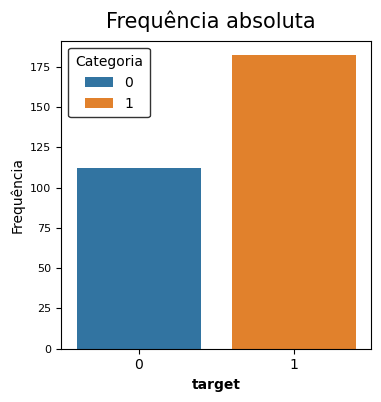

In [581]:
# Visualizando frequêcia da classe predita

split_clean.countPlot(variavel='target')

**As classes estão desbalanceadas**

In [582]:
#aplicando
split_clean.oversampling()

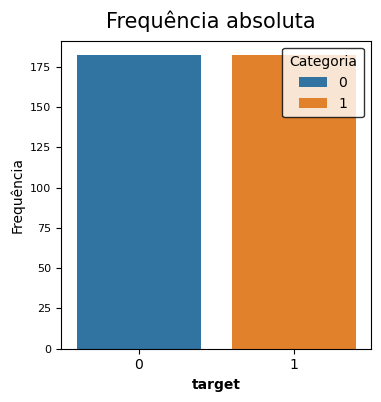

In [583]:
#verificando
split_clean.countPlot('target')

In [584]:
#VErificar na
split_clean.X_train.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

## Transformação

In [585]:
#Capturando retorno da classe splitCelan()

X_train, X_test, y_train, y_test = split_clean.return_all()

In [586]:
#Instanciando dados na classe transform
trasnformacao = transform(X_train, X_test, y_train, y_test)

In [587]:
#teste de cardinalidade
labels_discretizar = trasnformacao.cardinalidade()

In [588]:
# visualizando labels com alta cardinalidade
labels_discretizar

['Alkaline_Phosphotase']

- Escalonamento.

In [589]:
escalonar = list(set(trasnformacao.X_train.columns) - set(labels_discretizar))
escalonar

['Aspartate_Aminotransferase',
 'Total_Bilirubin',
 'Albumin_and_Globulin_Ratio',
 'Alamine_Aminotransferase',
 'Albumin']

In [590]:
trasnformacao.X_train.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

In [591]:
#testando treinamento
trasnformacao.MinMaxScaler_train(escalonar)

In [592]:
#transformação na base de treinamento
trasnformacao.MinMaxScaler_apply(escalonar)

In [593]:
trasnformacao.X_train.isna().any()

Total_Bilirubin                       False
Alkaline_Phosphotase                  False
Alamine_Aminotransferase              False
Aspartate_Aminotransferase            False
Albumin                               False
Albumin_and_Globulin_Ratio            False
Aspartate_Aminotransferase_scalled    False
Total_Bilirubin_scalled               False
Albumin_and_Globulin_Ratio_scalled    False
Alamine_Aminotransferase_scalled      False
Albumin_scalled                       False
dtype: bool

In [594]:
#visualizando
trasnformacao.X_train

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled
0,3.900000,150.000000,36.000000,27.000000,3.900000,1.340000,0.112583,0.708333,0.723077,0.298851,0.652174
1,0.800000,174.000000,21.000000,47.000000,2.300000,1.000000,0.245033,0.062500,0.461538,0.126437,0.304348
2,0.800000,156.000000,12.000000,15.000000,3.700000,1.100000,0.033113,0.062500,0.538462,0.022989,0.608696
3,0.800000,195.000000,18.000000,15.000000,3.000000,0.800000,0.033113,0.062500,0.307692,0.091954,0.456522
4,0.900000,159.000000,24.000000,25.000000,4.400000,1.700000,0.099338,0.083333,1.000000,0.160920,0.760870
...,...,...,...,...,...,...,...,...,...,...,...
359,4.404256,145.199054,33.990542,87.620807,3.057825,1.079622,0.514045,0.813387,0.522786,0.275753,0.469092
360,0.680684,137.161368,20.709059,16.806838,2.206598,0.680684,0.045078,0.037642,0.215911,0.123093,0.284043
361,1.618408,261.029854,49.154227,68.616909,3.481592,1.099403,0.388191,0.233002,0.538002,0.450049,0.561216
362,1.217830,155.493021,15.657362,19.178298,3.934264,1.032868,0.060783,0.149548,0.486822,0.065027,0.659623


In [595]:
#Eliminando variáveis originais
trasnformacao.X_train.drop(escalonar, axis = 1, inplace=True)

In [596]:
#verificar a existência de novos dados nan
trasnformacao.X_train.isna().any()

Alkaline_Phosphotase                  False
Aspartate_Aminotransferase_scalled    False
Total_Bilirubin_scalled               False
Albumin_and_Globulin_Ratio_scalled    False
Alamine_Aminotransferase_scalled      False
Albumin_scalled                       False
dtype: bool

* Discretização

In [597]:
#teste de discretização
trasnformacao.discretizacao_treinamento(labels=labels_discretizar)

In [598]:
trasnformacao.X_train.isna().any()

Aspartate_Aminotransferase_scalled    False
Total_Bilirubin_scalled               False
Albumin_and_Globulin_Ratio_scalled    False
Alamine_Aminotransferase_scalled      False
Albumin_scalled                       False
Alkaline_Phosphotase_Intervalo        False
dtype: bool

In [599]:
trasnformacao.X_train

,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled,Alkaline_Phosphotase_Intervalo
0,0.112583,0.708333,0.723077,0.298851,0.652174,4
1,0.245033,0.062500,0.461538,0.126437,0.304348,6
2,0.033113,0.062500,0.538462,0.022989,0.608696,5
3,0.033113,0.062500,0.307692,0.091954,0.456522,7
4,0.099338,0.083333,1.000000,0.160920,0.760870,5
...,...,...,...,...,...,...
359,0.514045,0.813387,0.522786,0.275753,0.469092,4
360,0.045078,0.037642,0.215911,0.123093,0.284043,4
361,0.388191,0.233002,0.538002,0.450049,0.561216,10
362,0.060783,0.149548,0.486822,0.065027,0.659623,5


In [600]:
trasnformacao.X_train.head()

,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled,Alkaline_Phosphotase_Intervalo
0,0.112583,0.708333,0.723077,0.298851,0.652174,4
1,0.245033,0.062500,0.461538,0.126437,0.304348,6
2,0.033113,0.062500,0.538462,0.022989,0.608696,5
3,0.033113,0.062500,0.307692,0.091954,0.456522,7
4,0.099338,0.083333,1.000000,0.160920,0.760870,5


In [601]:
trasnformacao.X_train.isna().any()

Aspartate_Aminotransferase_scalled    False
Total_Bilirubin_scalled               False
Albumin_and_Globulin_Ratio_scalled    False
Alamine_Aminotransferase_scalled      False
Albumin_scalled                       False
Alkaline_Phosphotase_Intervalo        False
dtype: bool

**É necessário aplicar as transformações aos dados de teste (com exceção do balanceamento)**

In [602]:
#Confirmando inexistência de na's
trasnformacao.X_test.isna().any()

Total_Bilirubin               False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Albumin                       False
Albumin_and_Globulin_Ratio    False
dtype: bool

In [603]:
# visualizando dados
trasnformacao.X_test.head()


,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,0.8,160,34,20,3.7,1.1
1,2.9,218,33,37,1.5,1.0
2,0.7,192,18,15,4.2,1.3
3,0.5,170,21,28,2.5,0.8
4,0.6,188,28,43,3.3,0.6


In [604]:
# escalonando variáveis
escalonar

['Aspartate_Aminotransferase',
 'Total_Bilirubin',
 'Albumin_and_Globulin_Ratio',
 'Alamine_Aminotransferase',
 'Albumin']

In [605]:
# aplicando na base de teste
trasnformacao.MinMaxScaler_apply(variaveis=escalonar, teste=True)

In [606]:
trasnformacao.X_test.head()

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled
0,0.8,160,34,20,3.7,1.1,0.066225,0.062500,0.538462,0.275862,0.608696
1,2.9,218,33,37,1.5,1.0,0.178808,0.500000,0.461538,0.264368,0.130435
2,0.7,192,18,15,4.2,1.3,0.033113,0.041667,0.692308,0.091954,0.717391
3,0.5,170,21,28,2.5,0.8,0.119205,0.000000,0.307692,0.126437,0.347826
4,0.6,188,28,43,3.3,0.6,0.218543,0.020833,0.153846,0.206897,0.521739


In [607]:
#Eliminando variáveis originais
trasnformacao.X_test.drop(escalonar, axis = 1, inplace=True)

In [608]:
trasnformacao.X_test.head()

,Alkaline_Phosphotase,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled
0,160,0.066225,0.062500,0.538462,0.275862,0.608696
1,218,0.178808,0.500000,0.461538,0.264368,0.130435
2,192,0.033113,0.041667,0.692308,0.091954,0.717391
3,170,0.119205,0.000000,0.307692,0.126437,0.347826
4,188,0.218543,0.020833,0.153846,0.206897,0.521739


In [609]:
# discretizando variáveis
labels_discretizar

['Alkaline_Phosphotase']

In [610]:
#aplicando
trasnformacao.discretizacao_teste(labels=labels_discretizar)

In [611]:
#vesualizando variáveis de teste
trasnformacao.X_test.head()

,Alkaline_Phosphotase,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled,Alkaline_Phosphotase_Intervalo
0,160,0.066225,0.062500,0.538462,0.275862,0.608696,4
1,218,0.178808,0.500000,0.461538,0.264368,0.130435,7
2,192,0.033113,0.041667,0.692308,0.091954,0.717391,6
3,170,0.119205,0.000000,0.307692,0.126437,0.347826,5
4,188,0.218543,0.020833,0.153846,0.206897,0.521739,6


In [612]:
#Eliminando variáveis originais
trasnformacao.X_test.drop(labels_discretizar, axis = 1, inplace = True)

In [613]:
trasnformacao.X_test.head()

,Aspartate_Aminotransferase_scalled,Total_Bilirubin_scalled,Albumin_and_Globulin_Ratio_scalled,Alamine_Aminotransferase_scalled,Albumin_scalled,Alkaline_Phosphotase_Intervalo
0,0.066225,0.062500,0.538462,0.275862,0.608696,4
1,0.178808,0.500000,0.461538,0.264368,0.130435,7
2,0.033113,0.041667,0.692308,0.091954,0.717391,6
3,0.119205,0.000000,0.307692,0.126437,0.347826,5
4,0.218543,0.020833,0.153846,0.206897,0.521739,6


In [614]:
trasnformacao.y_test

,target
0,1
1,1
2,0
3,1
4,1
...,...
94,0
95,1
96,1
97,1


**Toda base de dados está pronta para ser treinada por algoritmos de ML**

## Escolha do algoritmo

Conforme defino do escopo do projeto, temos um problema de classificação binária (0, 1), por isso, utilizaremos algoritmos de aprendizagem supervisionada, para classificação.

Como benchmark utilizaremos o algoritmo de Regressão logística.

In [694]:
#DF para salvar métricas
metricas = pd.DataFrame()

## Treinamento

**1 - Regressão Logística**

In [617]:
# Definição de hiperparâmetros
hiperparams_v1 = {"C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                  "penalty": ['l1', 'l2']
                  }

In [618]:
# Instanciando gridsearch
modelo_v1 = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = hiperparams_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [619]:
print(trasnformacao.X_train.isna().any())
print("_"*50)
print(trasnformacao.y_train.isna().any())

Aspartate_Aminotransferase_scalled    False
Total_Bilirubin_scalled               False
Albumin_and_Globulin_Ratio_scalled    False
Alamine_Aminotransferase_scalled      False
Albumin_scalled                       False
Alkaline_Phosphotase_Intervalo        False
dtype: bool
__________________________________________________
target    False
dtype: bool


In [620]:
# fit - dados de treinamento
modelo_v1.fit(trasnformacao.X_train, trasnformacao.y_train)


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [621]:
# visualizando estimador
modelo_v1.best_estimator_

LogisticRegression(C=1)

In [622]:
# aplicando aos dados de teste
y_pred_v1 = modelo_v1.predict(trasnformacao.X_test)

In [623]:
# vesualizando as transformações
y_pred_v1[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [624]:
# extraindo probabilidades de previsão de classe 1
y_pred_v1_prob = modelo_v1.predict_proba(trasnformacao.X_test)[:, 1]

In [625]:
# Como exemplo, verificando um dos pontos
index = range(50,60)
for i in index:
    print(f'Para o ponto {i}, o valor real é {trasnformacao.y_test.iloc[i][0]}, e a previsão foi de {y_pred_v1[i]}, com probabilidade de {y_pred_v1_prob[i]}')
    

Para o ponto 50, o valor real é 1, e a previsão foi de 0, com probabilidade de 0.3404096311714729
Para o ponto 51, o valor real é 1, e a previsão foi de 0, com probabilidade de 0.486154398133032
Para o ponto 52, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.4708179134198059
Para o ponto 53, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.5931119370011652
Para o ponto 54, o valor real é 1, e a previsão foi de 1, com probabilidade de 0.6010362350931051
Para o ponto 55, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.4096575891962182
Para o ponto 56, o valor real é 1, e a previsão foi de 1, com probabilidade de 0.6104505029567575
Para o ponto 57, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.5720861441986136
Para o ponto 58, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.3477262045360241
Para o ponto 59, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.29955724419921503


In [626]:
# calulando matrix de confusão
confusion_matrix(trasnformacao.y_test, y_pred_v1)

array([[27, 11],
       [42, 19]], dtype=int64)

In [627]:
# calculando métricas
    #roc_auc
    #curva_roc/auc
    #acuracia

In [628]:
# roc_auc
roc_auc_v1 = roc_auc_score(trasnformacao.y_test, y_pred_v1)
roc_auc_v1

0.5110008628127697

In [629]:
#auc
fpr_v1, tpr_v1, thresholds_v1 = roc_curve(trasnformacao.y_test, y_pred_v1_prob)
auc_v1 = auc(fpr_v1, tpr_v1)
auc_v1

0.5966350301984469

In [630]:
#accuracia
acuracia_v1 = accuracy_score(trasnformacao.y_test, y_pred_v1)
acuracia_v1

0.46464646464646464

**Observando ordem de importância das variáveis**

In [632]:
# treinando modelo de LR com melhor parâmetro
modelo_v1 = LogisticRegression(C=1)
modelo_v1.fit(trasnformacao.X_train, trasnformacao.y_train)
y_pred_v1 = modelo_v1.predict(trasnformacao.X_test)

In [649]:
# extraindo variáveis
indices = np.argsort(-abs(modelo_v1.coef_[0, :]))

In [650]:
# visualizando
print("Variáveis importantes")
print("-"*50)
for var in indices:
    print(trasnformacao.X_train.columns[var])
    

Variáveis importantes
--------------------------------------------------
Total_Bilirubin_scalled
Alamine_Aminotransferase_scalled
Aspartate_Aminotransferase_scalled
Albumin_and_Globulin_Ratio_scalled
Albumin_scalled
Alkaline_Phosphotase_Intervalo


**Interpretação**

In [695]:
dict_v1 = {
    "Nome":"Modelo_v1",
    "Algoritmo":"Logistic Regression",
    "ROC_AUC":roc_auc_v1,
    "AUC":auc_v1,
    "ACURACIA":acuracia_v1
}

In [696]:
metricas = metricas.append(dict_v1, ignore_index = True)

In [697]:
metricas

,Nome,Algoritmo,ROC_AUC,AUC,ACURACIA
0,Modelo_v1,Logistic Regression,0.511001,0.596635,0.464646


In [665]:
#salvando modelo
with open(file='modelo_v1.pkl', mode='wb'):
    joblib.dump(modelo_v1, 'modelo_v1.pkl')

**1 - Random Forest**

In [666]:
# Definição de hiperparmetros
hiperparams_v2 = {
    
    "n_estimators":[100, 200, 300, 400, 500],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [671]:
#Instanciando GridSearch
modelo_v2 = RandomizedSearchCV(estimator = RandomForestClassifier(),
                        param_distributions = hiperparams_v2,
                        n_jobs = -1,
                        scoring = 'roc_auc',
                        n_iter = 15)

In [672]:
# treinando modelo
modelo_v2.fit(trasnformacao.X_train, trasnformacao.y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [673]:
# visualizando estimados
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=500)

In [674]:
# previsoes
y_pred_v2 = modelo_v2.predict(trasnformacao.X_test)

In [675]:
# calculando probabilidade para classe 1 - será necessário para o cálculo das métricas
y_pred_v2_prob = modelo_v2.predict_proba(trasnformacao.X_test)[:, 1]

In [676]:
# Como exemplo, verificando um dos pontos
index = range(50,60)
for i in index:
    print(f'Para o ponto {i}, o valor real é {trasnformacao.y_test.iloc[i][0]}, e a previsão foi de {y_pred_v2[i]}, com probabilidade de {y_pred_v2_prob[i]}')
    

Para o ponto 50, o valor real é 1, e a previsão foi de 0, com probabilidade de 0.3
Para o ponto 51, o valor real é 1, e a previsão foi de 1, com probabilidade de 0.666
Para o ponto 52, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.61
Para o ponto 53, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.534
Para o ponto 54, o valor real é 1, e a previsão foi de 1, com probabilidade de 0.714
Para o ponto 55, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.638
Para o ponto 56, o valor real é 1, e a previsão foi de 1, com probabilidade de 0.728
Para o ponto 57, o valor real é 0, e a previsão foi de 1, com probabilidade de 0.526
Para o ponto 58, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.272
Para o ponto 59, o valor real é 0, e a previsão foi de 0, com probabilidade de 0.432


In [677]:
# Matriz de confusão
confusion_matrix(trasnformacao.y_test, y_pred_v2)

array([[16, 22],
       [26, 35]], dtype=int64)

**Métricas**

In [682]:
# roc_auc
roc_auc_v2 = roc_auc_score(trasnformacao.y_test, y_pred_v2)
roc_auc_v2

0.497411561691113

In [684]:
# auc
fpr_v2, tpr_v2, thresholds_v2 = roc_curve(trasnformacao.y_test, y_pred_v2_prob)
auc_v2 = auc(fpr_v2, tpr_v2)
auc_v2

0.5724762726488353

In [686]:
# Acuracia
acuracia_v2 = accuracy_score(trasnformacao.y_test, y_pred_v2)
acuracia_v2

0.5151515151515151

**Verificando ordem de importância das variáveis**

In [687]:
# recalcilando RandomFlorest com melhor estimados
modelo_v2 = RandomForestClassifier(n_estimators=500)
modelo_v2.fit(trasnformacao.X_train, trasnformacao.y_train)
y_pred_v2 = modelo_v2.predict(trasnformacao.X_test)

In [688]:
# analisando coeficientes
modelo_v2.feature_importances_

array([0.19915688, 0.16634138, 0.14684359, 0.18489045, 0.16241578,
       0.14035192])

In [689]:
#capturando indices
index = np.argsort(-abs(modelo_v2.feature_importances_[0:, ]))

index

array([0, 3, 1, 4, 2, 5], dtype=int64)

In [690]:
#printando
print("Variáveis importantes")
print("-"*50)
for var in index:
    print(trasnformacao.X_train.columns[var])

Variáveis importantes
--------------------------------------------------
Aspartate_Aminotransferase_scalled
Alamine_Aminotransferase_scalled
Total_Bilirubin_scalled
Albumin_scalled
Albumin_and_Globulin_Ratio_scalled
Alkaline_Phosphotase_Intervalo


In [698]:
# complinando métricas
dict_v2 =  {
    "Nome":"Modelo_v2",
    "Algoritmo":"Random Forest",
    "ROC_AUC":roc_auc_v2,
    "AUC":auc_v2,
    "ACURACIA":acuracia_v2
}

In [699]:
#adicionando ao DF
metricas = metricas.append(dict_v2, ignore_index=True)

In [700]:
#visualizando
metricas

,Nome,Algoritmo,ROC_AUC,AUC,ACURACIA
0,Modelo_v1,Logistic Regression,0.511001,0.596635,0.464646
1,Modelo_v2,Random Forest,0.497412,0.572476,0.515152


In [701]:
#salvando modelo
with open(file='modelo_v2.pkl', mode='wb'):
    joblib.dump(modelo_v2, 'modelo_v2.pkl')

**3 - SVV**

In [707]:
# seleção de hiperparametros
    #aqui a função já vai retornar os melhores parâmetros para seguirmos com o treinamento
def HiperParamsSelection(x, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {"C":Cs, "gamma": gammas}
    gridSearch = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid = param_grid, cv = nfolds)
    gridSearch.fit(x,y)
    gridSearch.best_params_
    return gridSearch.best_params_

In [708]:
#aplicando
HiperParamsSelection(trasnformacao.X_train, trasnformacao.y_train, nfolds = 5)

{'C': 10, 'gamma': 1}

In [719]:
# instanciando modelo com melhor hiperparametros
modelo_v3 = SVC(kernel = 'rbf',
               C = 10,
               gamma = 1,
               probability = True)



In [720]:
#treinamento
modelo_v3.fit(trasnformacao.X_train, trasnformacao.y_train)



SVC(C=10, gamma=1, probability=True)

In [726]:
#previsao
y_pred_v3 = modelo_v3.predict(trasnformacao.X_test)



In [727]:
#probabildiades
y_pred_v3_prob = modelo_v3.predict_proba(trasnformacao.X_test)[0:, 1]

In [728]:
# matriz de confusão
confusion_matrix(trasnformacao.y_test, y_pred_v3)

array([[18, 20],
       [38, 23]], dtype=int64)

**Extraindo métricas**

In [729]:
#roc_auc

roc_auc_v3 = roc_auc_score(trasnformacao.y_test, y_pred_v3)
roc_auc_v3

0.4253666954270923

In [730]:
#auc
fpr_v3, tpr_v3, thresholds_v3 = roc_curve(trasnformacao.y_test, y_pred_v3_prob)
auc_v3 = auc(fpr_v3, tpr_v3)
auc_v3

0.46937014667817084

In [732]:
#acuracia
acuracia_v3 = accuracy_score(trasnformacao.y_test, y_pred_v3)
acuracia_v3

0.41414141414141414

In [733]:
#compilando métricas
dict_v3 =  {
    "Nome":"Modelo_v3",
    "Algoritmo":"SVV",
    "ROC_AUC":roc_auc_v3,
    "AUC":auc_v3,
    "ACURACIA":acuracia_v3
}

In [734]:
# adicionando ao df
metricas = metricas.append(dict_v3, ignore_index=True)

In [735]:
#visualizando
metricas

,Nome,Algoritmo,ROC_AUC,AUC,ACURACIA
0,Modelo_v1,Logistic Regression,0.511001,0.596635,0.464646
1,Modelo_v2,Random Forest,0.497412,0.572476,0.515152
2,Modelo_v3,SVV,0.425367,0.469370,0.414141


In [736]:
#salvando modelo
with open(file='modelo_v3.pkl', mode='wb'):
    joblib.dump(modelo_v3, 'modelo_v3.pkl')

## Avaliação

In [737]:
# metricas
metricas

,Nome,Algoritmo,ROC_AUC,AUC,ACURACIA
0,Modelo_v1,Logistic Regression,0.511001,0.596635,0.464646
1,Modelo_v2,Random Forest,0.497412,0.572476,0.515152
2,Modelo_v3,SVV,0.425367,0.469370,0.414141


## Seguindo...


Os algoritmos treinados não chegaram na precisão requerida para o projeto. Contudo, há espaço para otimização, que seria a próxima fase deste projeto. Conforme observado acima, as suposições estatísticas não foram validadas (tendo em vista o objetivo deste projeto).